<a href="https://colab.research.google.com/github/shirleypandya/mri/blob/master/AP_Capstone_MRI_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

# https://tensorflow.org/install
pip install tensorflow==2.0.0-alpha0

     |████████████████████████████████| 79.9MB 79kB/s 
     |████████████████████████████████| 3.0MB 45.4MB/s 
     |████████████████████████████████| 419kB 55.3MB/s 
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [0]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#train zip
train_file = "/content/drive/My Drive/Colab Notebooks/train.zip"

In [0]:
import zipfile

with zipfile.ZipFile(train_file, 'r') as z:
    z.extractall()

In [0]:
import os
import cv2

def load_image(file_path):
    return cv2.imread(file_path)

def extract_label(file_name):
    return 1 if "co" in file_name else 0

train_path = "./Train/"
image_files = os.listdir(train_path)
train_images = [load_image(train_path + file) for file in image_files]
train_labels = [extract_label(file) for file in image_files]

In [0]:
def preprocess_image(img, side=96):
    min_side = min(img.shape[0], img.shape[1])
    img = img[:min_side, :min_side]
    img = cv2.resize(img, (side,side))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img / 255.0

In [0]:
import matplotlib.pyplot as plt

for i in range(len(train_images)):
    train_images[i] = preprocess_image(train_images[i])

In [0]:
import numpy as np

train_images = np.expand_dims(train_images, axis=-1)
train_labels = np.array(train_labels)
print(train_images.shape, train_labels.shape)

(96, 96, 96, 1) (96,)


In [0]:
import tensorflow as tf
print("Tensorflow:", tf.__version__)

layers = [
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding="same", activation=tf.nn.relu, input_shape=train_images.shape[1:]),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=256, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=2, activation=tf.nn.softmax)
]

model = tf.keras.Sequential(layers)
model.compile(optimizer=tf.optimizers.Adam(),
              loss=tf.losses.SparseCategoricalCrossentropy(),
              metrics=[tf.metrics.SparseCategoricalAccuracy()])
model.fit(train_images, train_labels, epochs=30, batch_size=50)
model.save_weights("model.tf")

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

Tensorflow: 2.0.0-alpha0
Epoch 1/30
96/96 [==============================] - 1s 14ms/sample - loss: 0.6981 - sparse_categorical_accuracy: 0.4792
Epoch 2/30
96/96 [==============================] - 1s 12ms/sample - loss: 0.6919 - sparse_categorical_accuracy: 0.4896
Epoch 3/30
96/96 [==============================] - 1s 12ms/sample - loss: 0.6855 - sparse_categorical_accuracy: 0.5625
Epoch 4/30
96/96 [==============================] - 1s 12ms/sample - loss: 0.6813 - sparse_categorical_accuracy: 0.5625
Epoch 5/30
96/96 [==============================] - 1s 12ms/sample - loss: 0.6799 - sparse_categorical_accuracy: 0.5625
Epoch 6/30
96/96 [==============================] - 1s 12ms/sample - loss: 0.6691 - sparse_categorical_accuracy: 0.5625
Epoch 7/30
96/96 [==============================] - 1s 12ms/sample - loss: 0.6531 - sparse_categorical_accuracy: 0.5625
Epoch 8/30
96/96 [==============================] - 1s 12ms/sample - loss: 0.6234 - sparse_categorical_accuracy: 0.5625
Epoch 9/30
96/9

In [0]:
from google.colab import files
uploads = files.upload()

Saving 7_.jpg to 7_.jpg
Saving 9_0.jpg to 9_0.jpg
Saving 12_.jpg to 12_.jpg
Saving 14_0.jpg to 14_0.jpg
Saving 17_.jpg to 17_.jpg
Saving 19_0.jpg to 19_0.jpg
Saving 22_.jpg to 22_.jpg
Saving 24_0.jpg to 24_0.jpg
Saving 27_.jpg to 27_.jpg
Saving 29_0.jpg to 29_0.jpg
Saving 32_.jpg to 32_.jpg
Saving 34_0.jpg to 34_0.jpg
Saving 37_.jpg to 37_.jpg
Saving 38_0.jpg to 38_0.jpg
Saving co3_.jpg to co3_.jpg
Saving co5_0.jpg to co5_0.jpg
Saving co8_.jpg to co8_.jpg
Saving co10_0.jpg to co10_0.jpg
Saving co13_.jpg to co13_.jpg
Saving co15_0.jpg to co15_0.jpg
Saving co18_.jpg to co18_.jpg
Saving co20_0.jpg to co20_0.jpg
Saving co23_.jpg to co23_.jpg
Saving co25_0.jpg to co25_0.jpg


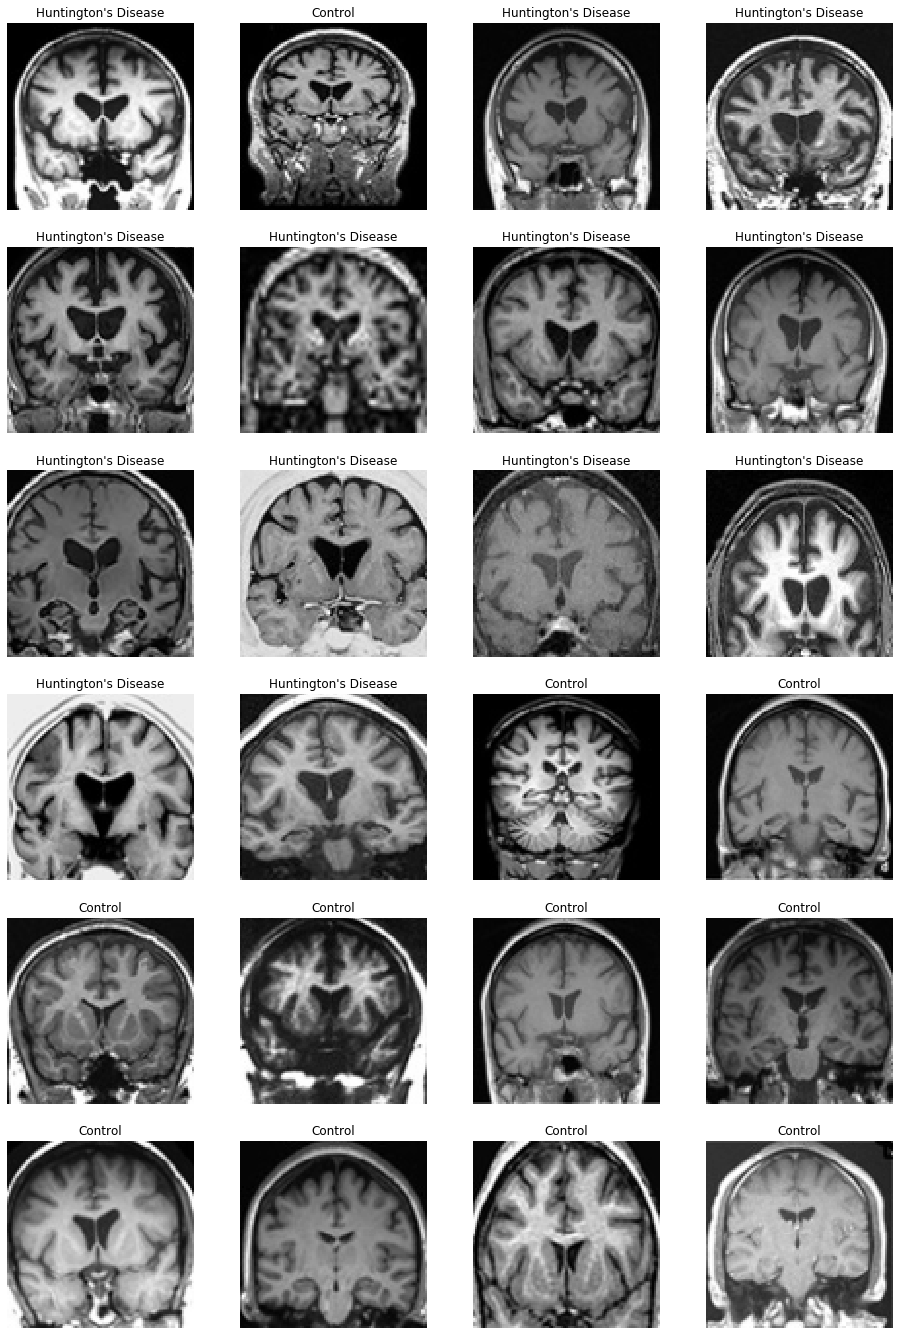

In [0]:
eval_images = [preprocess_image(load_image(file)) for file in uploads.keys()]
eval_model = tf.keras.Sequential(layers)
eval_model.load_weights("model.tf")
eval_predictions = eval_model.predict(np.expand_dims(eval_images, axis=-1))

cols = 4
rows = 6
fig = plt.gcf()
fig.set_size_inches(cols * 4, rows * 4)
for i in range(len(eval_images)):
  plt.subplot(rows, cols, i+1)
  plt.imshow(eval_images[i], cmap="gray")
  plt.title("Control" if np.argmax(eval_predictions[i]) ==1 else "Huntington's Disease") 
  plt.axis('off')